-----------------------------------------------------------------------------
                             Python Script
-----------------------------------------------------------------------------
Author: Dr. Hyunglok Kim
Affiliation: School of Earth Sciences and Environmental Engineering,
             Gwangju Institute of Science and Technology (GIST)

Date: 2023

Version: 1.0

Course: EN5422/EV4238 - Applied Machine Learning for Environmental Data Analysis

-----------------------------------------------------------------------------
                            COPYRIGHT NOTICE
-----------------------------------------------------------------------------
© 2023 Dr. Hyunglok Kim, Gwangju Institute of Science and Technology.
All Rights Reserved.

Permission is granted to any individual or institution to use, copy, or
redistribute this software and documentation, under the following
conditions:

1. The software and documentation must not be distributed for profit,
   and must retain this copyright notice.

2. Any modifications to the software must be documented and those
   modifications must be released under the same terms as this license.

3. This software and documentation is provided "as is". The author(s)
   disclaim all warranties, whether express or implied, including but
   not limited to implied warranties of merchantability and fitness
   for a particular purpose.

-----------------------------------------------------------------------------
                               DESCRIPTION
-----------------------------------------------------------------------------
This script is written as part of the teaching materials for the
EN5422/EV4238 course "Applied Machine Learning for Environmental Data Analysis"
at Gwangju Institute of Science and Technology (GIST).

For detailed usage, please refer to the accompanying documentation
or course materials.

For questions, feedback, or further information, please contact:

Dr. Hyunglok Kim
Email: hyunglokkim@gist.ac.kr

In [ ]:
import numpy as np

# Sample predictions (probabilities of positive class)
predictions = np.array([0.9, 0.7, 0.2, 0.4])

# Actual labels
actual_labels = np.array([1, 1, 0, 0])

# Calculate cross-entropy loss
cross_entropy_loss = -np.mean(actual_labels * np.log(predictions) + (1 - actual_labels) * np.log(1 - predictions))

print(f"Cross-Entropy Loss: {cross_entropy_loss}")

Cross-Entropy Loss: 0.2990011586691898


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np


# URL of the Hitters dataset
url = 'https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv'

# Load the dataset
hitters_data = pd.read_csv(url)
hitters_data = hitters_data.iloc[:, 1:]

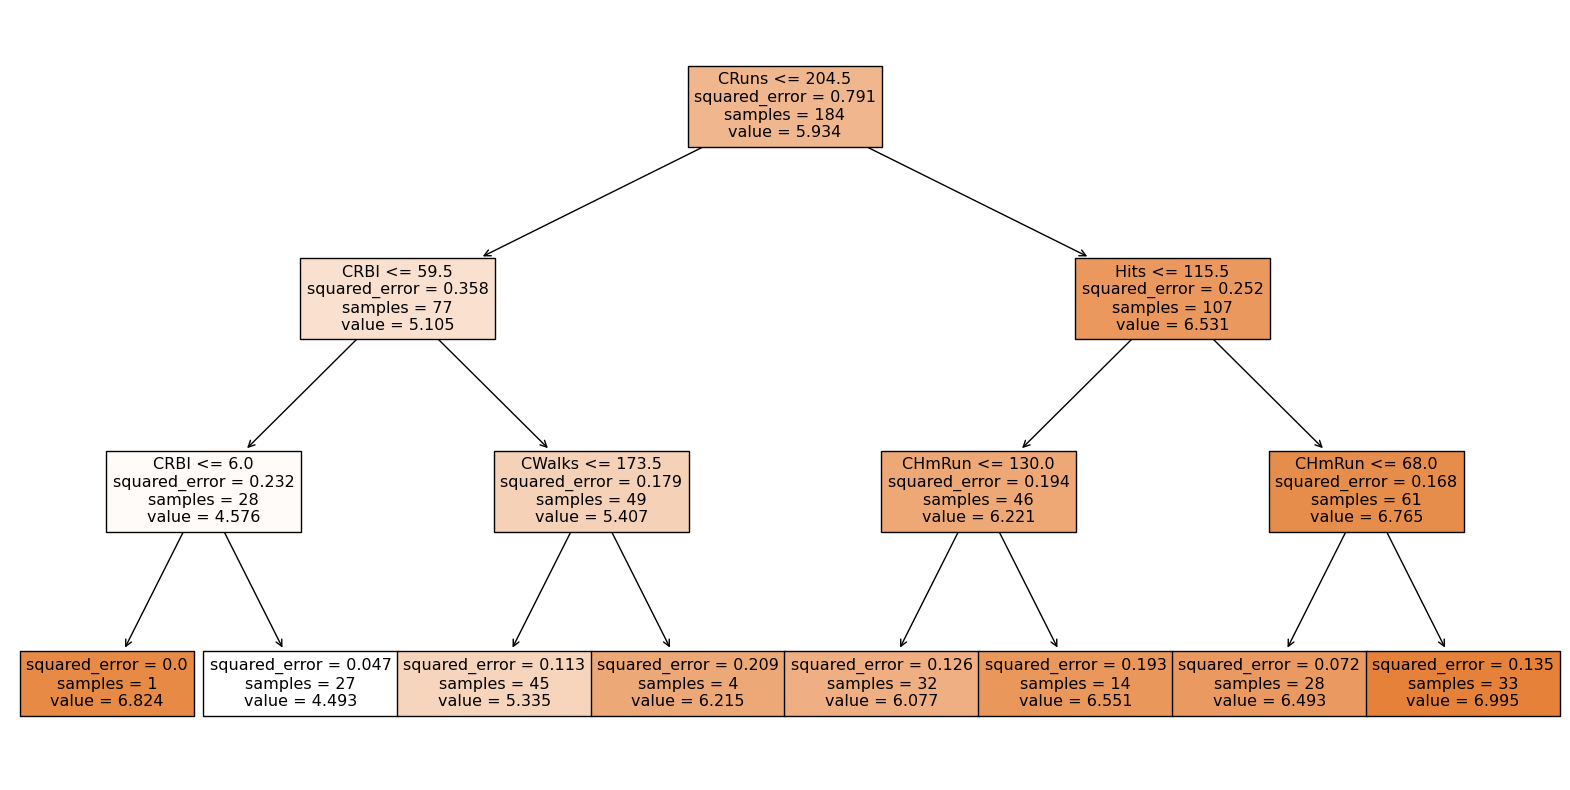

In [27]:
# Handle missing values (for this example, let's drop rows with missing values)
hitters_data = hitters_data.dropna()

# Assuming all other non-numeric columns are categorical, we perform one-hot encoding
hitters_data = pd.get_dummies(hitters_data, drop_first=True)

# Create a new column for the log of the salary
hitters_data['log_salary'] = np.log(hitters_data['Salary'])

# Split the data into features and target variable
X = hitters_data.drop(['Salary', 'log_salary'], axis=1)
y = hitters_data['log_salary']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree regressor model
tree_model = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_model.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X.columns, max_depth=3)  # Limiting depth for readability
plt.show()

In [46]:
hitters_data

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N,log_salary
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,632,43,10,475.0,1,1,1,6.163315
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,880,82,14,480.0,0,1,0,6.173786
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,200,11,3,500.0,1,0,1,6.214608
4,321,87,10,39,42,30,2,396,101,12,...,46,33,805,40,4,91.5,1,0,1,4.516339
5,594,169,4,74,51,35,11,4408,1133,19,...,336,194,282,421,25,750.0,0,1,0,6.620073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,...,311,138,325,9,3,700.0,1,0,1,6.551080
318,492,136,5,76,50,94,12,5511,1511,39,...,451,875,313,381,20,875.0,0,0,0,6.774224
319,475,126,3,61,43,52,6,1700,433,7,...,93,146,37,113,7,385.0,0,1,0,5.953243
320,573,144,9,85,60,78,8,3198,857,97,...,420,332,1314,131,12,960.0,0,0,0,6.866933


In [ ]:
# Export the decision tree to a DOT format
dot_data = export_graphviz(tree_model, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True)

# Use Graphviz to render the tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

'decision_tree.pdf'

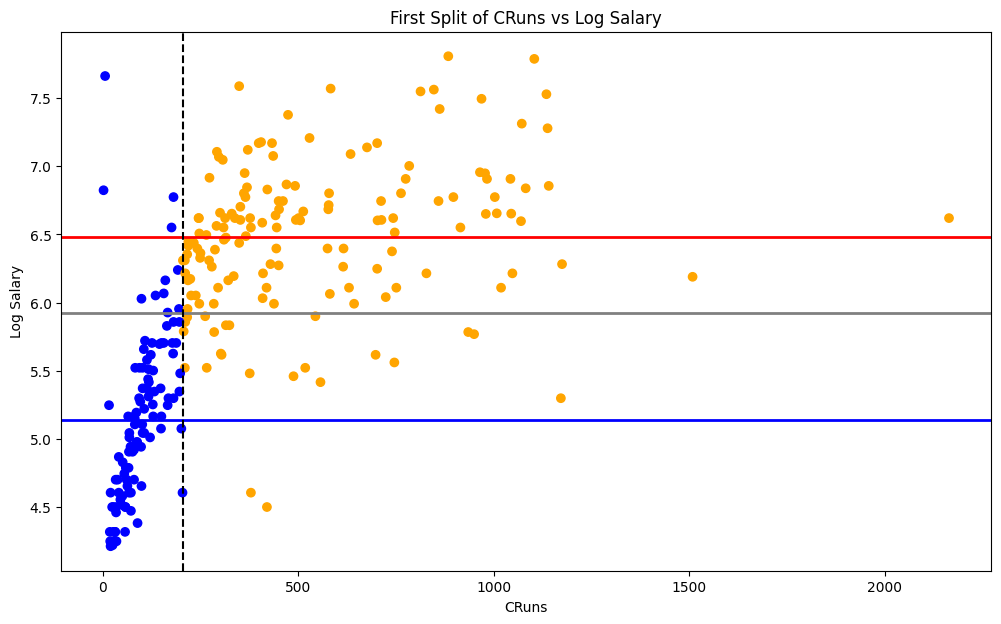

In [39]:
# Determine the split point and calculate the means
split_point = 204.5
left_mean = hitters_data[hitters_data['CRuns'] <= split_point]['log_salary'].mean()
right_mean = hitters_data[hitters_data['CRuns'] > split_point]['log_salary'].mean()

# Create the plot
plt.figure(figsize=(12, 7))

# Plot the points and color them based on the split
plt.scatter(hitters_data['CRuns'], hitters_data['log_salary'], c=hitters_data['CRuns'].apply(lambda x: 'blue' if x <= split_point else 'orange'))

# Plot the average lines
plt.axhline(y=left_mean, color='blue', linestyle='-', linewidth=2)
plt.axhline(y=right_mean, color='red', linestyle='-', linewidth=2)
plt.axhline(y= hitters_data['log_salary'].mean(), color='grey', linestyle='-', linewidth=2)

# Draw a vertical line at the split point
plt.axvline(x=split_point, color='k', linestyle='--')

# Set the labels and title
plt.xlabel('CRuns')
plt.ylabel('Log Salary')
plt.title('First Split of CRuns vs Log Salary')

# Show the plot
plt.show()

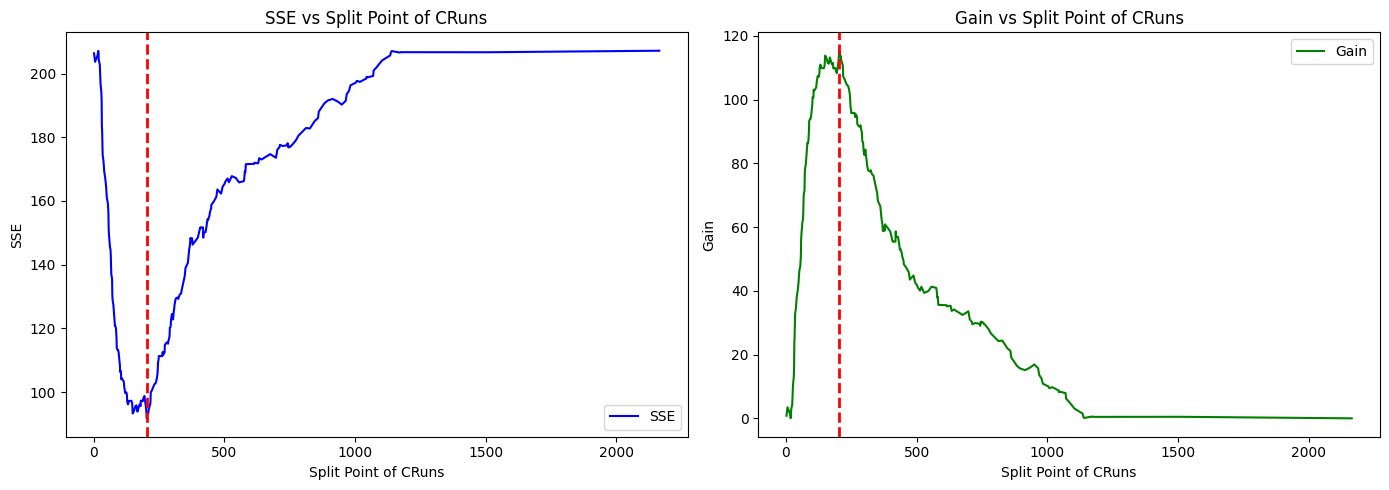

In [43]:
split_points = sorted(hitters_data['CRuns'].unique())
sse_values = []
gain_values = []
total_mean = hitters_data['log_salary'].mean()
total_sse = ((hitters_data['log_salary'] - total_mean)**2).sum()

for split_point in split_points:
    left_data = hitters_data[hitters_data['CRuns'] <= split_point]['log_salary']
    right_data = hitters_data[hitters_data['CRuns'] > split_point]['log_salary']

    left_mean = left_data.mean()
    right_mean = right_data.mean()

    left_sse = ((left_data - left_mean)**2).sum()
    right_sse = ((right_data - right_mean)**2).sum()

    sse = left_sse + right_sse
    gain = total_sse - sse

    sse_values.append(sse)
    gain_values.append(gain)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Subplot 1: SSE vs Split Point
axes[0].plot(split_points, sse_values, label='SSE', color='blue')
axes[0].set_xlabel('Split Point of CRuns')
axes[0].set_ylabel('SSE')
axes[0].set_title('SSE vs Split Point of CRuns')
axes[0].axvline(x=204.5, color='red', linestyle='--', linewidth=2)

axes[0].legend()

# Subplot 2: Gain vs Split Point
axes[1].plot(split_points, gain_values, label='Gain', color='green')
axes[1].set_xlabel('Split Point of CRuns')
axes[1].set_ylabel('Gain')
axes[1].set_title('Gain vs Split Point of CRuns')
axes[1].axvline(x=204.5, color='red', linestyle='--', linewidth=2)
axes[1].legend()

# Show the plot
plt.tight_layout()
plt.show()

In [44]:
X_train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
177,441,118,28,84,86,68,8,2723,750,126,433,420,309,190,2,2,0,0,0
184,586,159,12,72,79,53,9,3082,880,83,363,477,295,181,13,4,1,0,1
91,475,123,27,76,93,72,4,1810,471,108,292,343,267,226,10,6,1,0,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
162,165,39,2,13,9,16,3,196,44,2,18,10,18,332,19,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,629,168,18,73,102,40,18,8424,2464,164,1008,1072,402,1067,157,14,0,0,0
236,237,52,0,15,25,30,24,14053,4256,160,2165,1314,1566,523,43,6,1,1,1
93,511,138,25,76,96,61,3,592,164,28,87,110,71,157,7,8,0,1,0
137,343,103,6,48,36,40,15,4338,1193,70,581,421,325,211,56,13,0,0,0


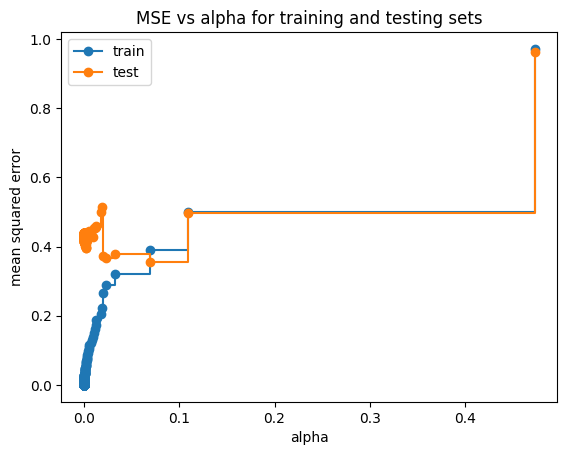

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

# Load a subset of the California housing dataset for faster processing
X, y = fetch_california_housing(return_X_y=True)
X_subset, y_subset = X[:500], y[:500]  # Using a subset of 500 data points

# Split the subset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, random_state=0)

# Fit a decision tree regressor on the training data of the subset
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)

# Cost complexity pruning (get the effective alphas and the corresponding total leaf impurities)
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train a decision tree regressor for each alpha and evaluate its performance
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Plot the accuracy of the trees as a function of ccp_alpha
train_scores = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("mean squared error")
ax.set_title("MSE vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()